# <center> $ Walmart Sales Prediction $ <center>

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

###### Dataset Info 
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart Store sales. Within this file you will find the following fields.


- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate
- Holiday Events\ Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\ Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\ Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\ Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

###### Acknowledgements
The dataset is taken from Kaggle.

##  $Data Exploration$

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula import api
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import norm


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.shape

(6435, 8)

- The Datset consists of 8 features & 6435 samples.

In [4]:
df.duplicated().sum()

0

- The dataset doesn't have any duplicates

In [5]:
# Reframing the columns

df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
#                                       8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

df.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [6]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [7]:
#Checking the stats of all the columns

display(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


- The stats seem to be fine, let us do further analysis on the Dataset

## $Exploratory Data Analysis (EDA)$

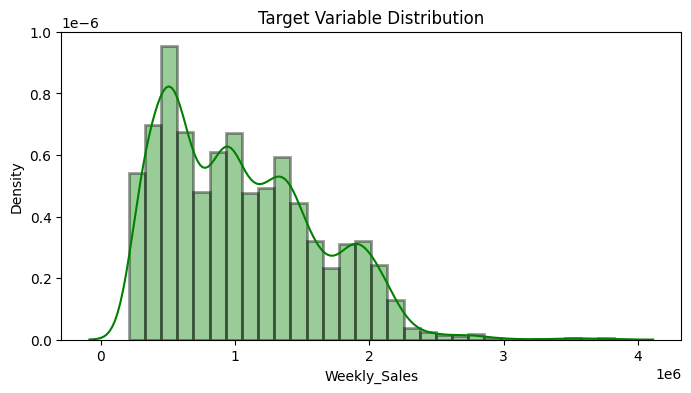

In [8]:
#Let us first analyze the distribution of the target variable(Weekly Sales)

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

<AxesSubplot: >

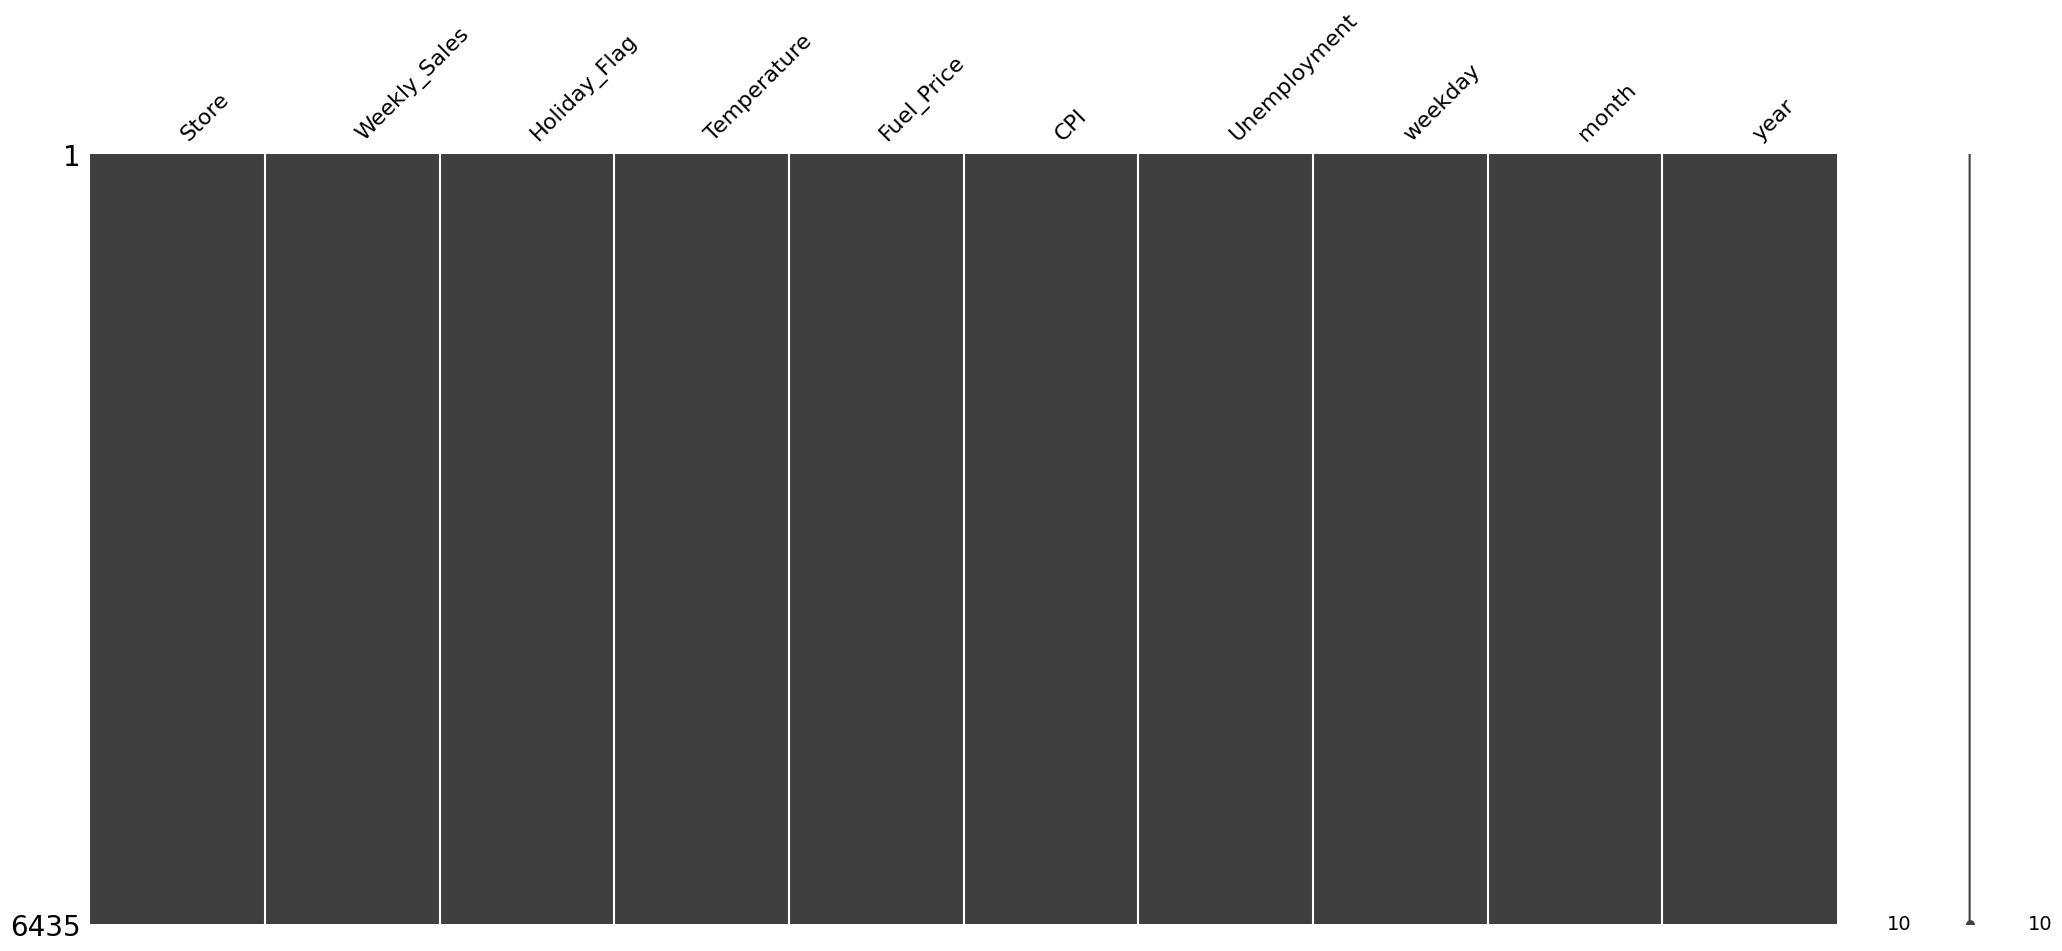

In [9]:
import missingno as msgn
msgn.matrix(df)

- There is no missing data found in the dataset

In [10]:
# converting days and months from numerics to categories
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['weekday'] = df['weekday'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df['month']= df['month'].map(months)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010


<AxesSubplot: xlabel='year', ylabel='count'>

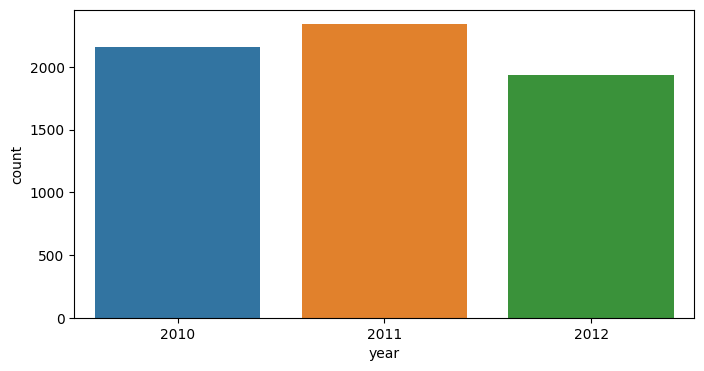

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["year"])

- 2011 has recorded highest number of sales then followed by 2010 and 2012.

<AxesSubplot: xlabel='weekday', ylabel='count'>

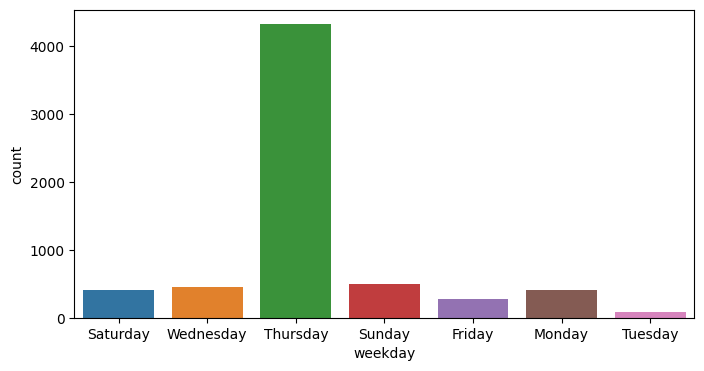

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["weekday"])

<AxesSubplot: xlabel='month', ylabel='count'>

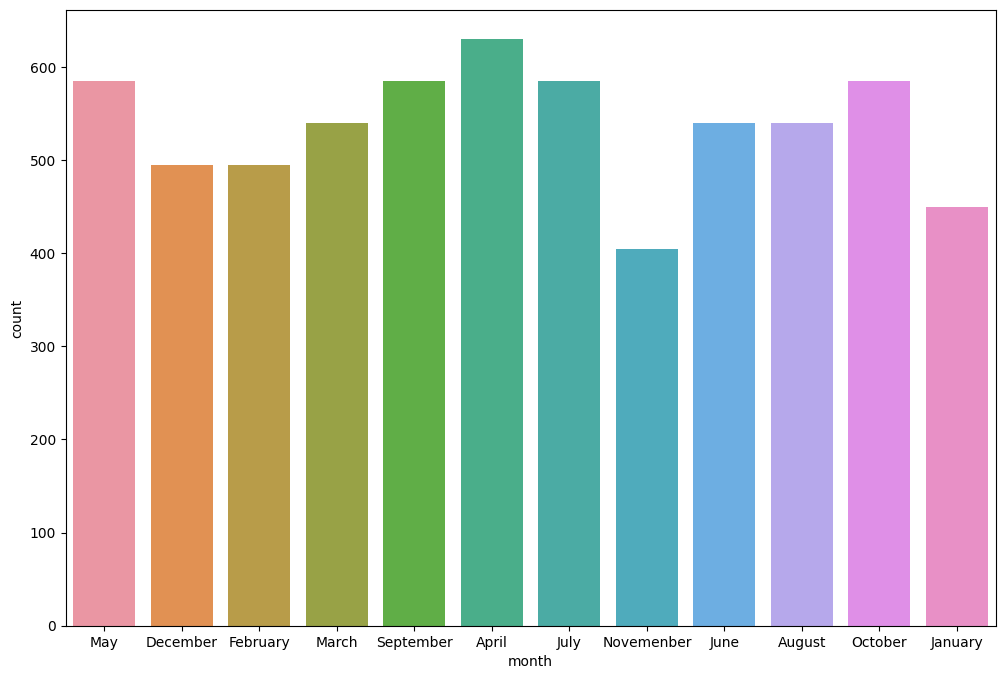

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x=df["month"])

Text(0.5, 1.0, 'Annual Sales')

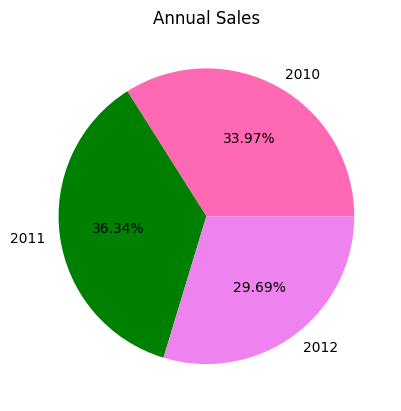

In [14]:
plt.pie(df.groupby('year')['Weekly_Sales'].sum(),labels=df['year'].unique(),normalize=True,
        autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')

Text(0.5, 1.0, 'Weekly Sales')

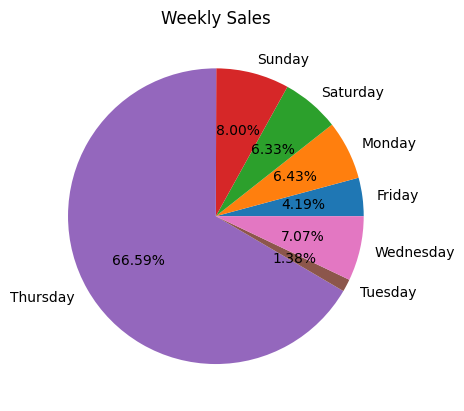

In [15]:
d_w=pd.DataFrame(df.groupby('weekday')['Weekly_Sales'].sum().reset_index())
plt.pie(d_w['Weekly_Sales'],labels= d_w['weekday'],autopct='%1.2f%%', normalize=True)
plt.title('Weekly Sales')

- More than 50% of sales happen on Thursday.

Text(0.5, 1.0, 'Monthly Sales')

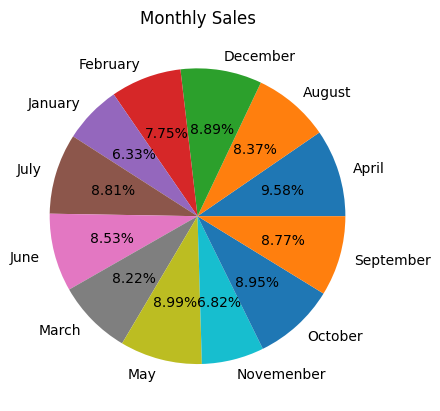

In [16]:
d_m=pd.DataFrame(df.groupby('month')['Weekly_Sales'].sum().reset_index())
plt.pie(d_m['Weekly_Sales'],labels=d_m['month'].unique(),normalize=True,autopct='%1.2f%%')
plt.title('Monthly Sales')

- Highest sales are recorded in April then followed by May, October, December ,September although their is little variance.

Text(0.5, 1.0, 'Holiday sales')

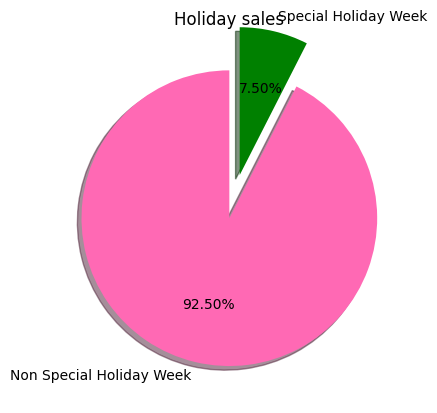

In [17]:
d_h = pd.DataFrame(df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index())
plt.pie(d_h['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],normalize=True,
        autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['hotpink','green'])
plt.title('Holiday sales')

- Most sales comes on non special holiday week which makes sense people may not want to spend their special grocery shopping they would probably shop before to celebrate their special holiday.

In [18]:
df.groupby('Store')['Weekly_Sales'].count().reset_index()

,Store,Weekly_Sales
0,1,143
1,2,143
2,3,143
3,4,143
4,5,143
5,6,143
6,7,143
7,8,143
8,9,143
9,10,143


In [19]:
d_s=pd.DataFrame(df.groupby('Store')['Weekly_Sales'].sum().reset_index())

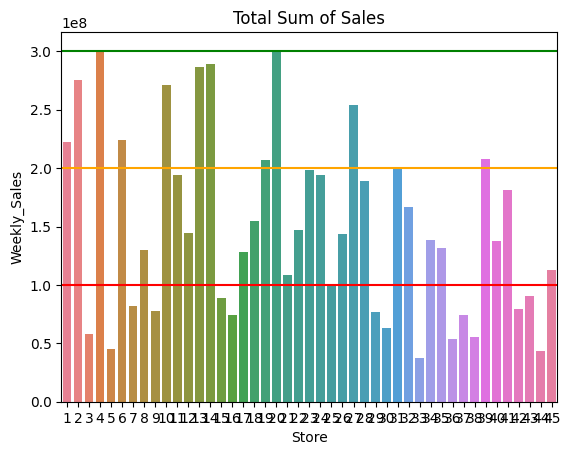

In [74]:
sns.barplot(data=d_s, x="Store", y="Weekly_Sales",palette="husl")
plt.xticks(rotation = 0)
plt.title('Total Sum of Sales')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=300000000,color = 'green')
plt.show()

In [21]:
df.groupby('Store')['Weekly_Sales'].sum().max()

301397792.46

- Stores getting total sales below the redline are underperforming
- Stores between red and orange are average
- Stores between orange and green are performing above average
- Stores touching the green line are very well performing

- All stores have equal number of sales yet store 20 has recorded highest sales.

In [22]:
d_hs = pd.DataFrame(df.groupby(['Store','Holiday_Flag'])['Weekly_Sales'].mean().reset_index())
d_hs

,Store,Holiday_Flag,Weekly_Sales
0,1,0,1.546957e+06
1,1,1,1.665748e+06
2,2,0,1.914209e+06
3,2,1,2.079267e+06
4,3,0,4.000648e+05
...,...,...,...
85,43,1,6.359463e+05
86,44,0,3.032536e+05
87,44,1,2.960356e+05
88,45,0,7.821985e+05


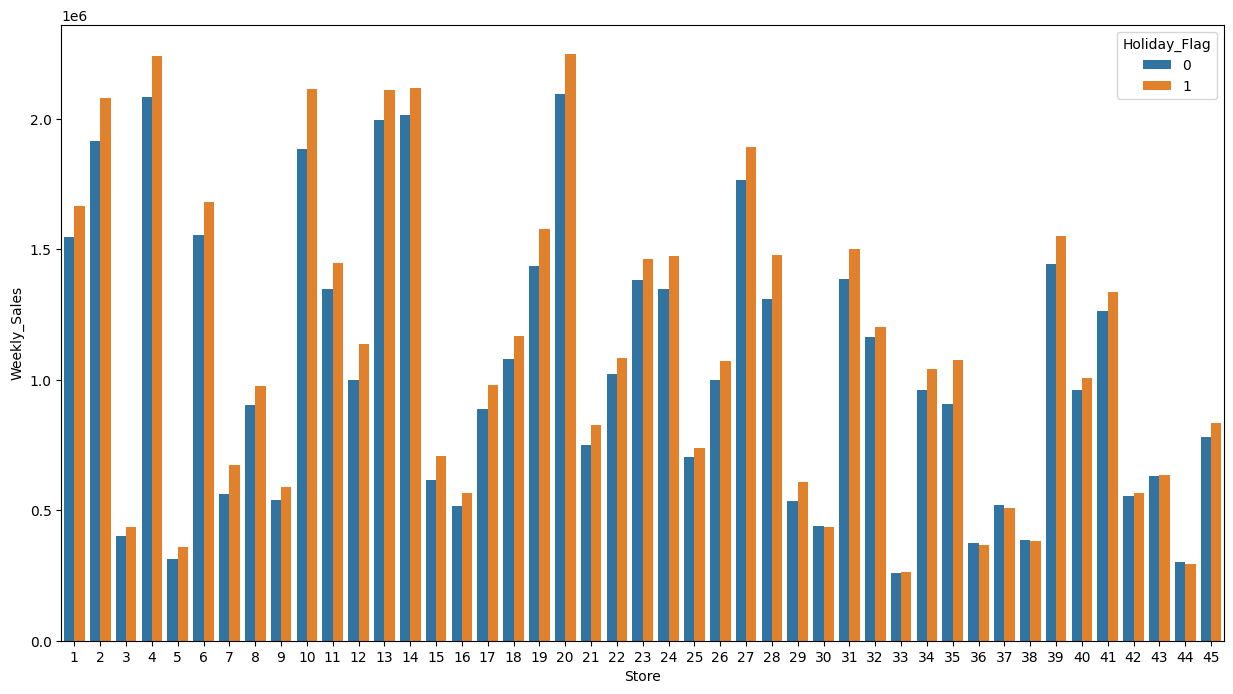

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Store',y = ('Weekly_Sales'),hue= 'Holiday_Flag',data=d_hs)
plt.show()

- People generally tend to spend more during holiday weeks
- The average spending is more during holiday weeks than normal weeks

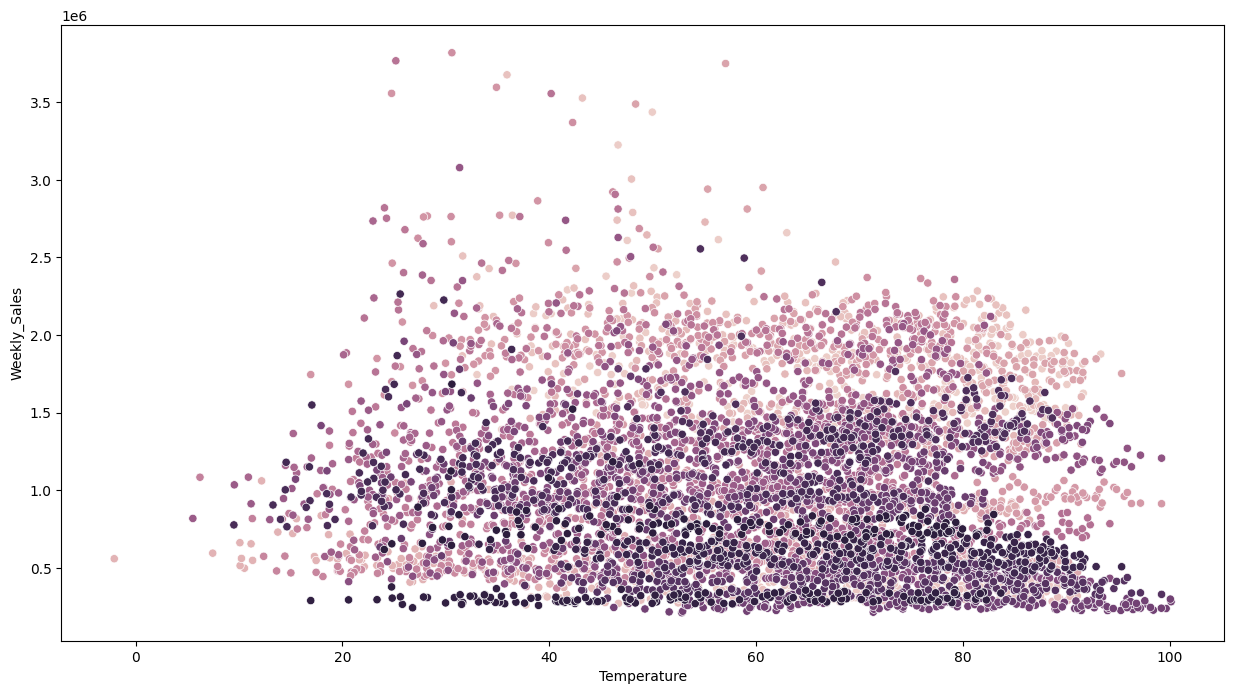

In [24]:
# Temparature vs Weekly Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Temperature',y = 'Weekly_Sales',hue = 'Store',data = df,legend = False)
plt.show()

- We can say that temperature doesn't have much impact

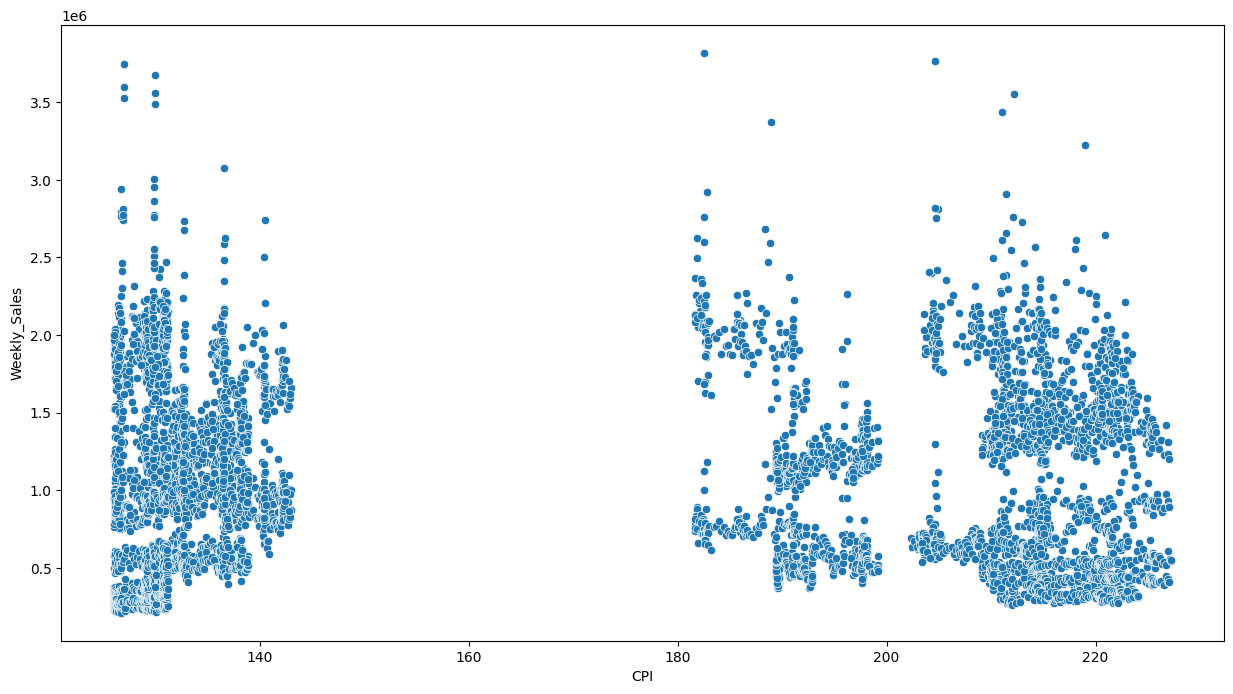

In [25]:
# CPI vs Weekly Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'CPI',y = 'Weekly_Sales',data = df,legend = False)
plt.show()

- Again no significant pattern can be observed

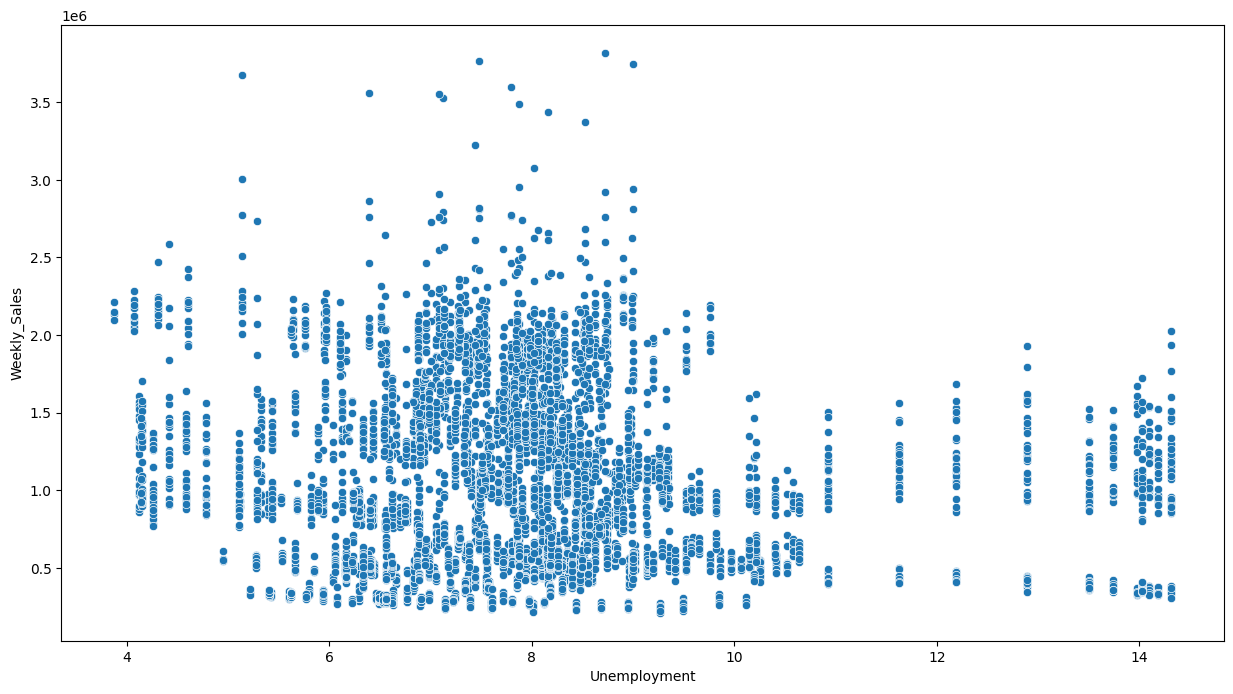

In [26]:
# Unemployment vs Week_sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Unemployment',y = 'Weekly_Sales',data = df,legend = False)
plt.show()

- Again no significant pattern can be observed

Text(0.5, 1.0, 'Correlation Matrix')

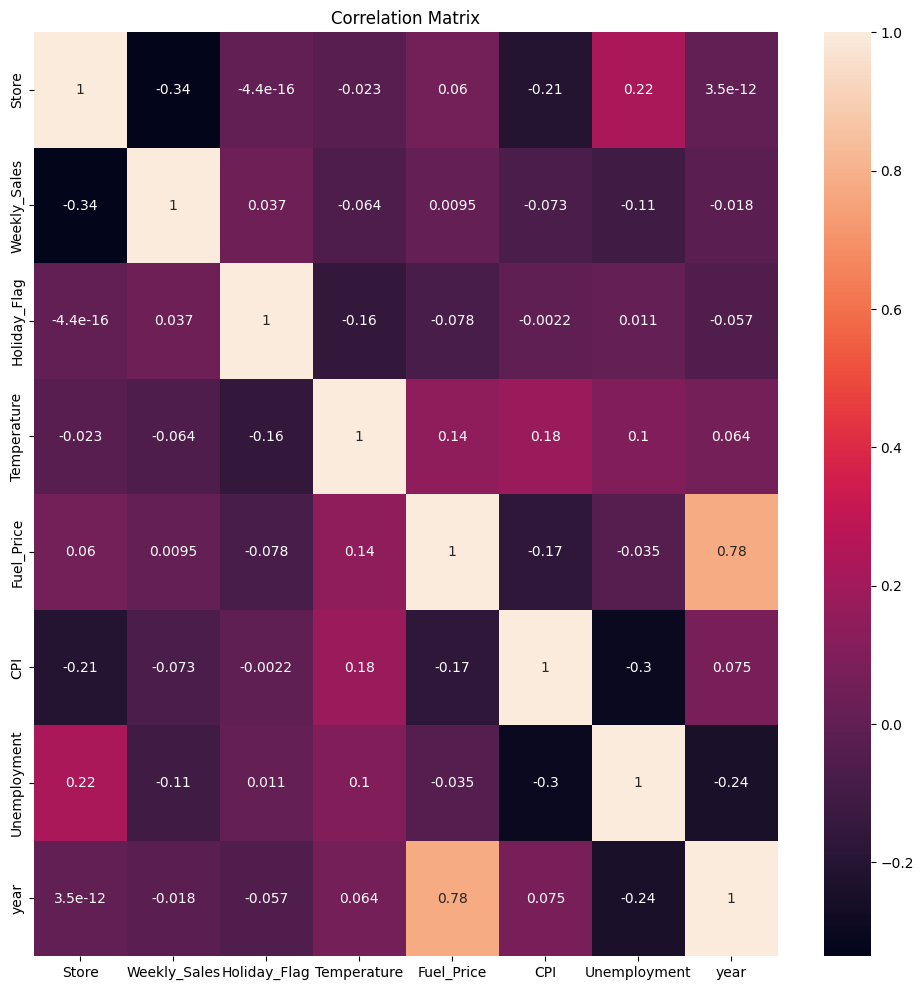

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

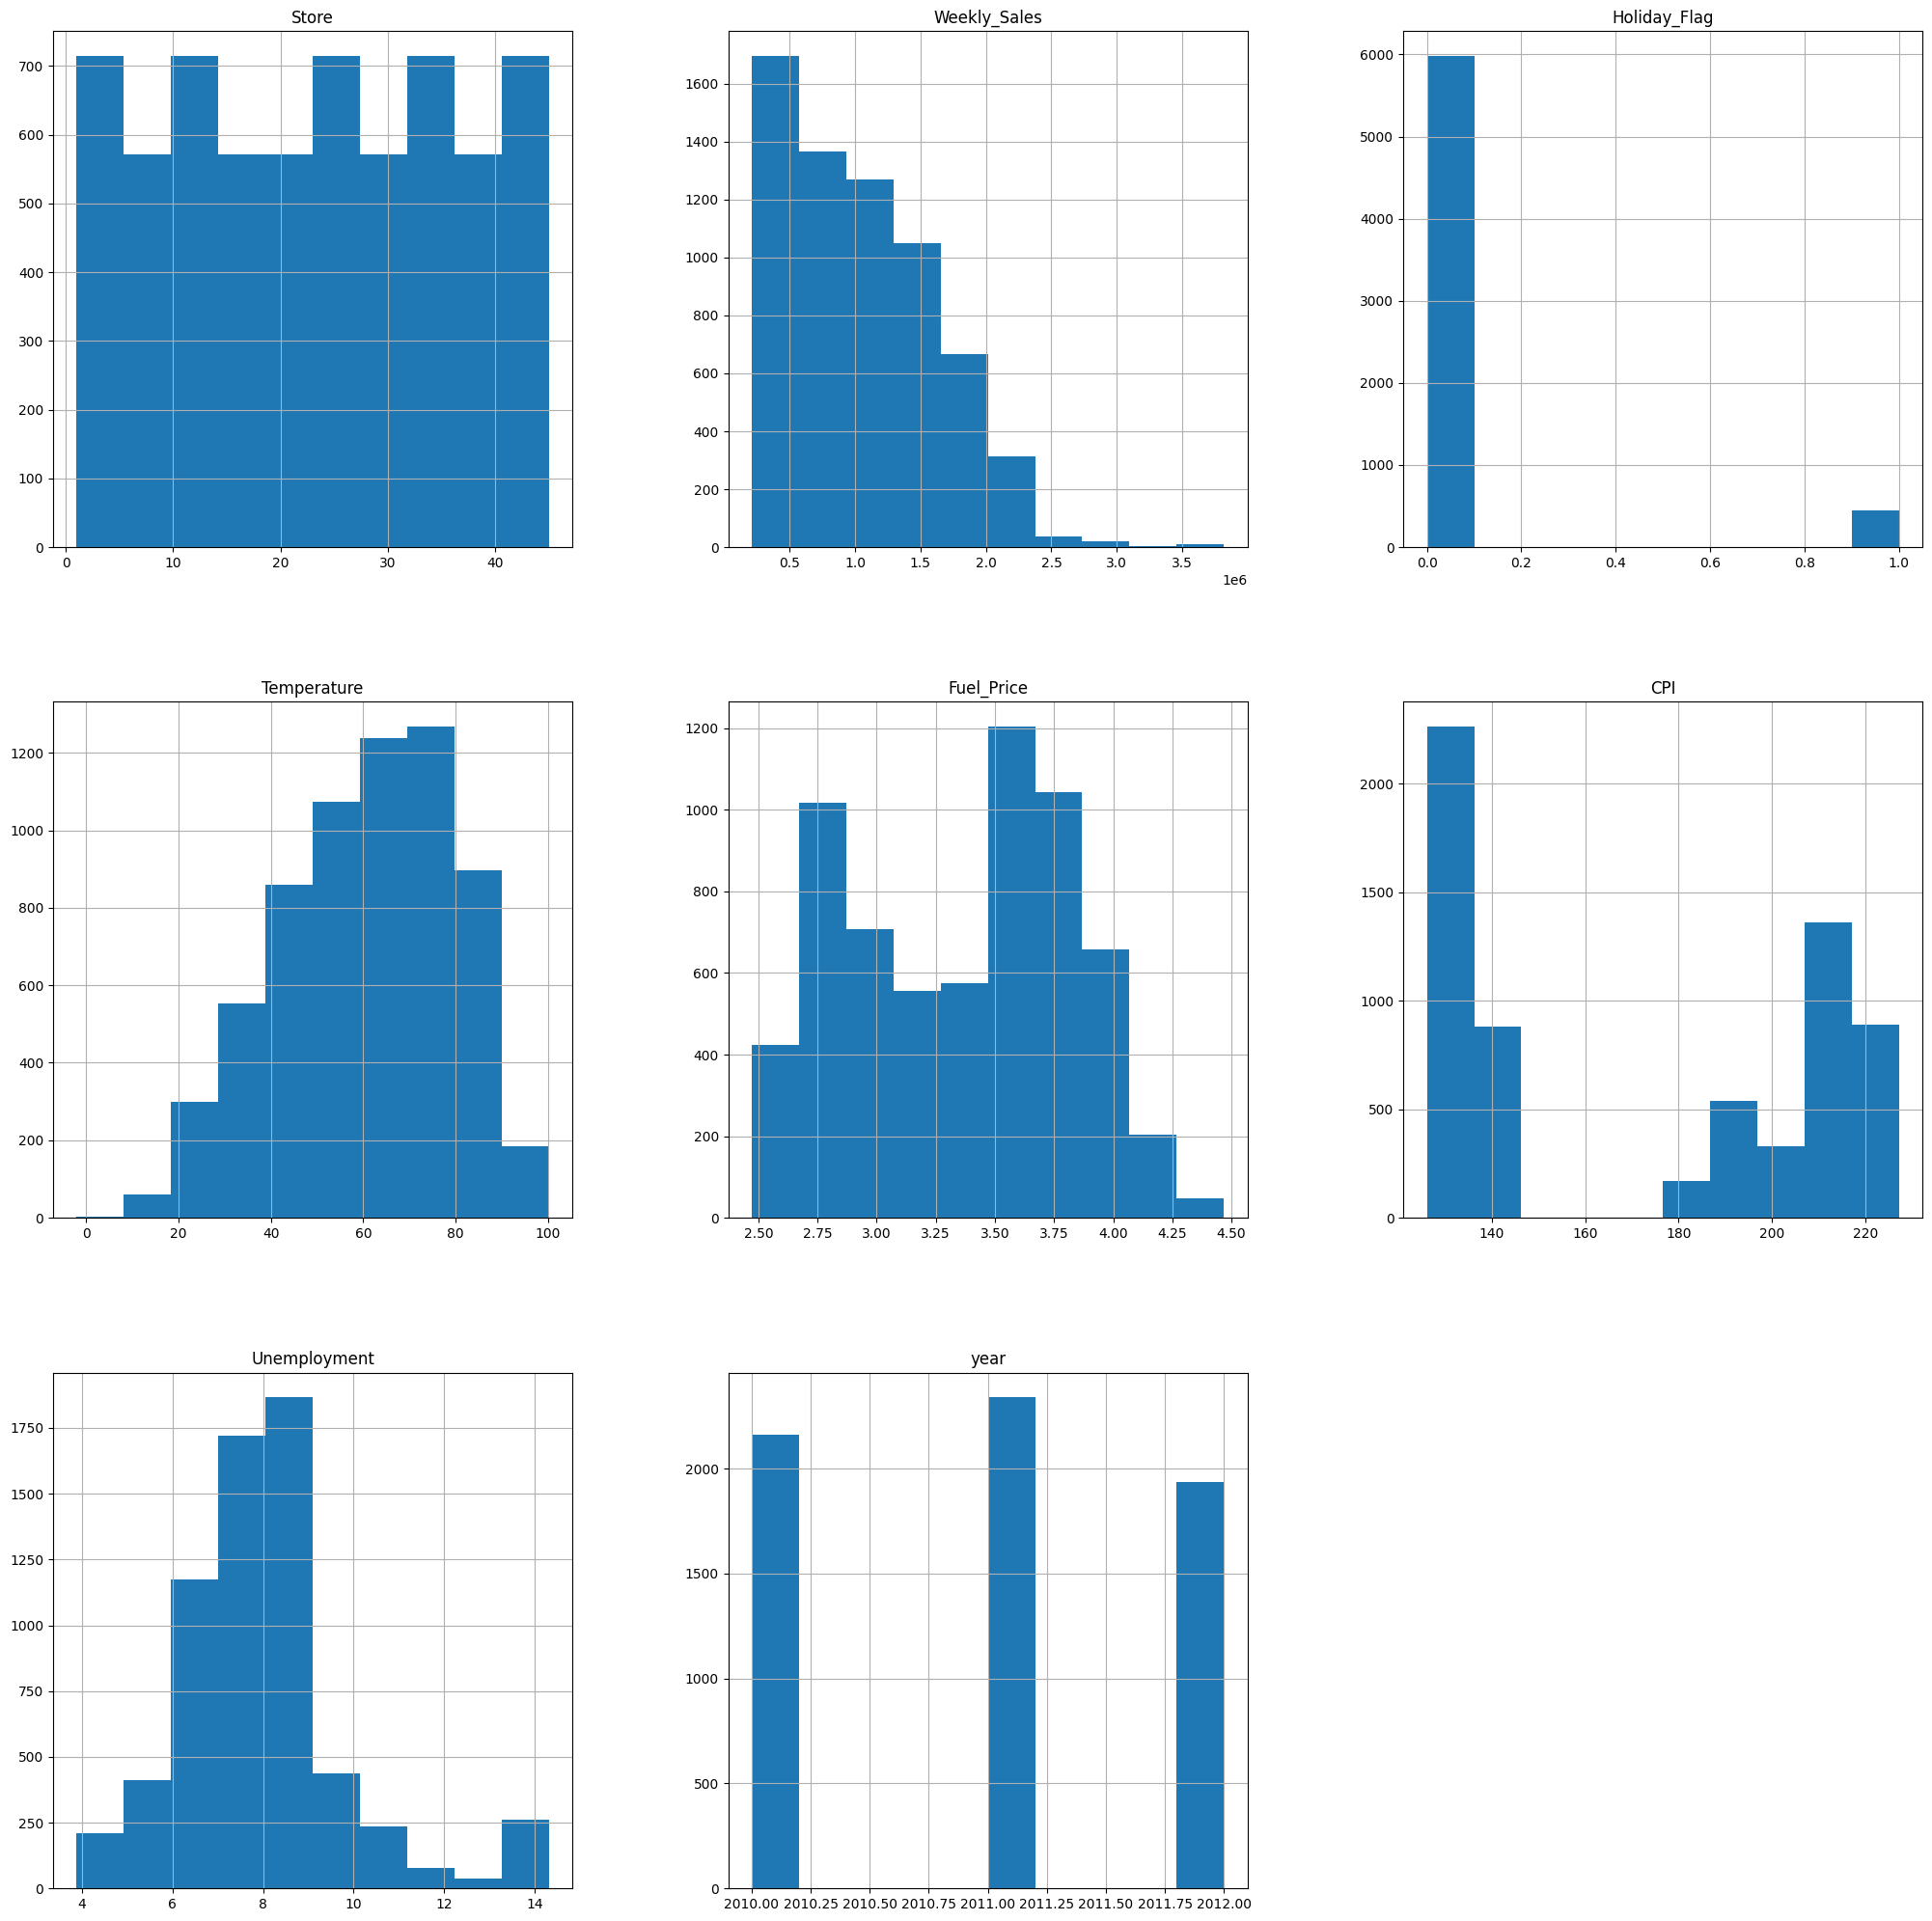

In [28]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
df.hist(ax=ax)
plt.tight_layout

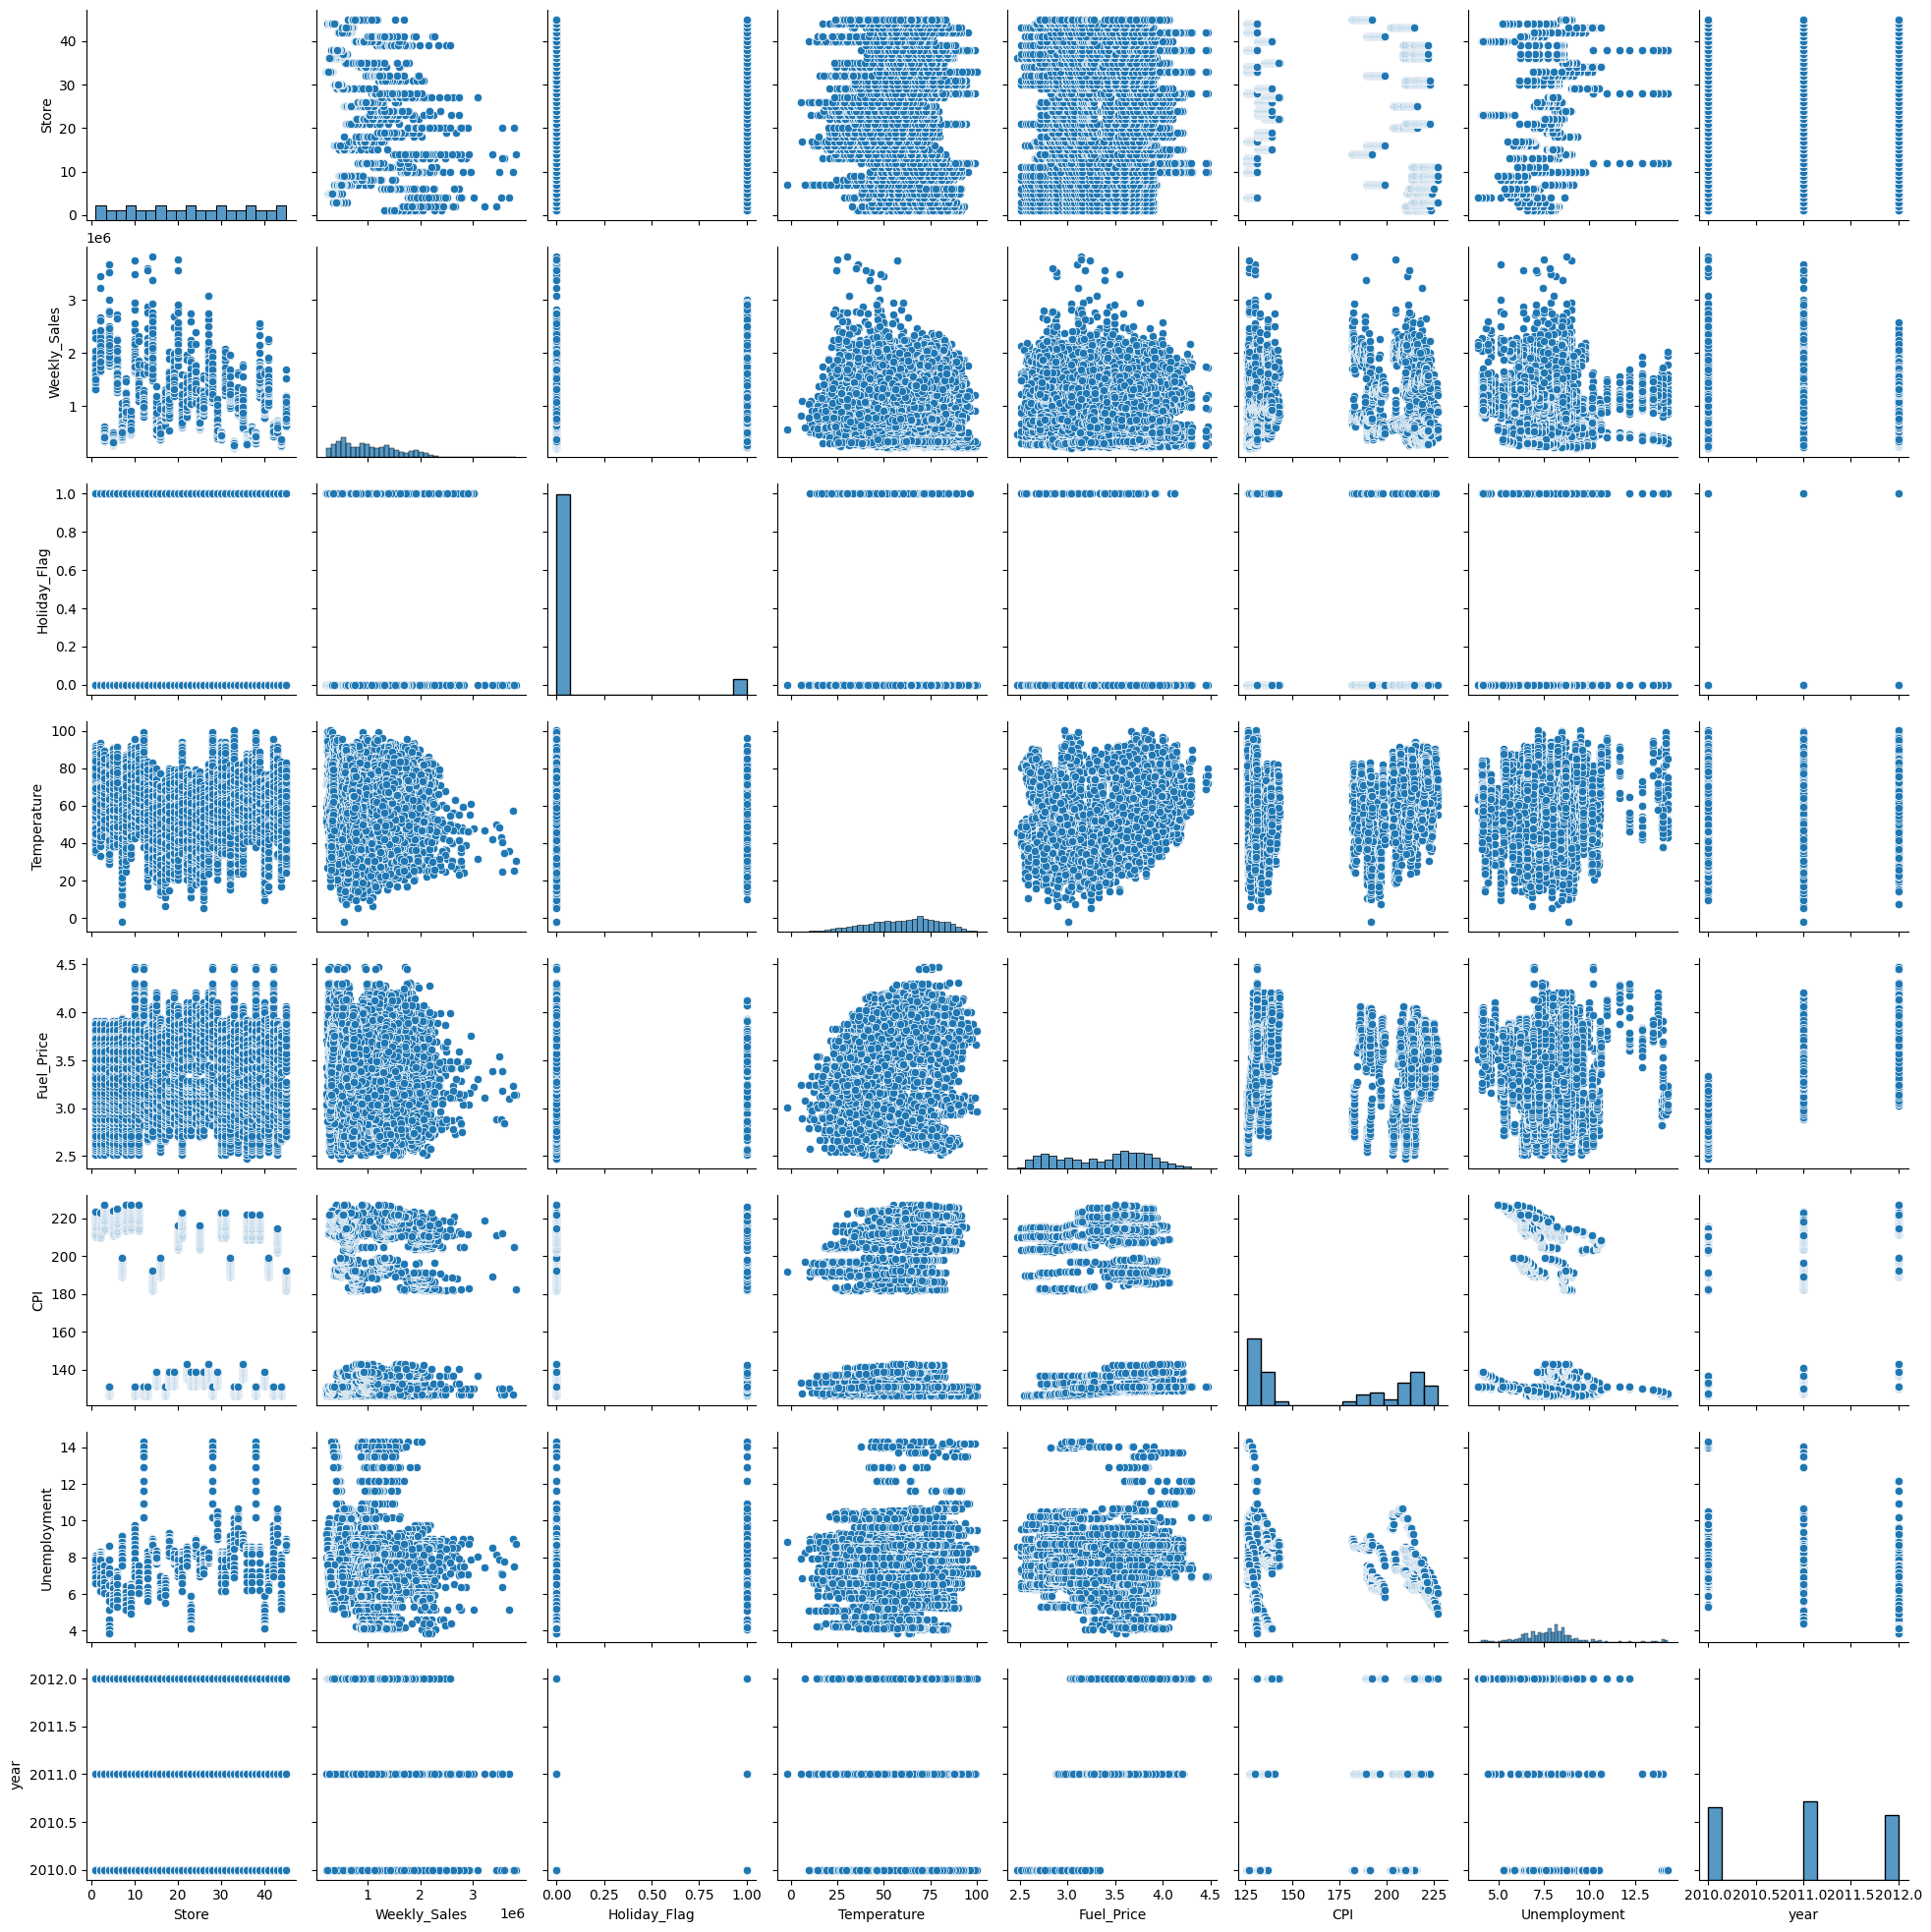

In [29]:
#Pairplot
sns.pairplot(df)
plt.show()

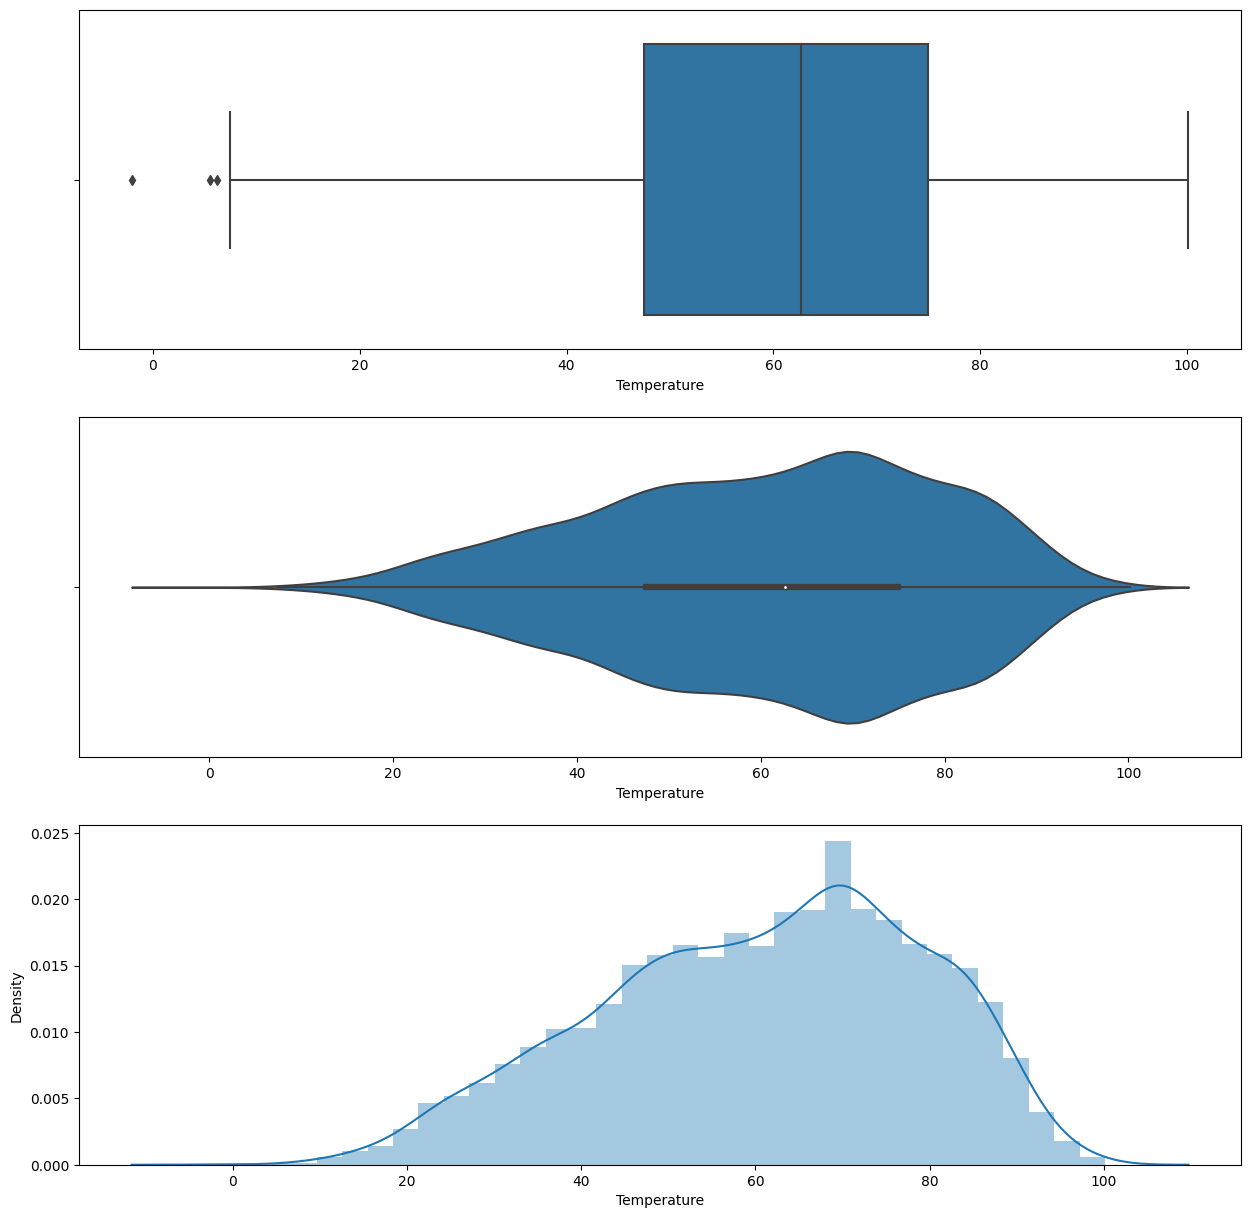

In [30]:
# Temperature
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))
sns.boxplot(x = df['Temperature'], ax=axs[0])
sns.violinplot(x = df['Temperature'], ax=axs[1])
sns.distplot( df['Temperature'],kde=True, ax=axs[2])
plt.show()

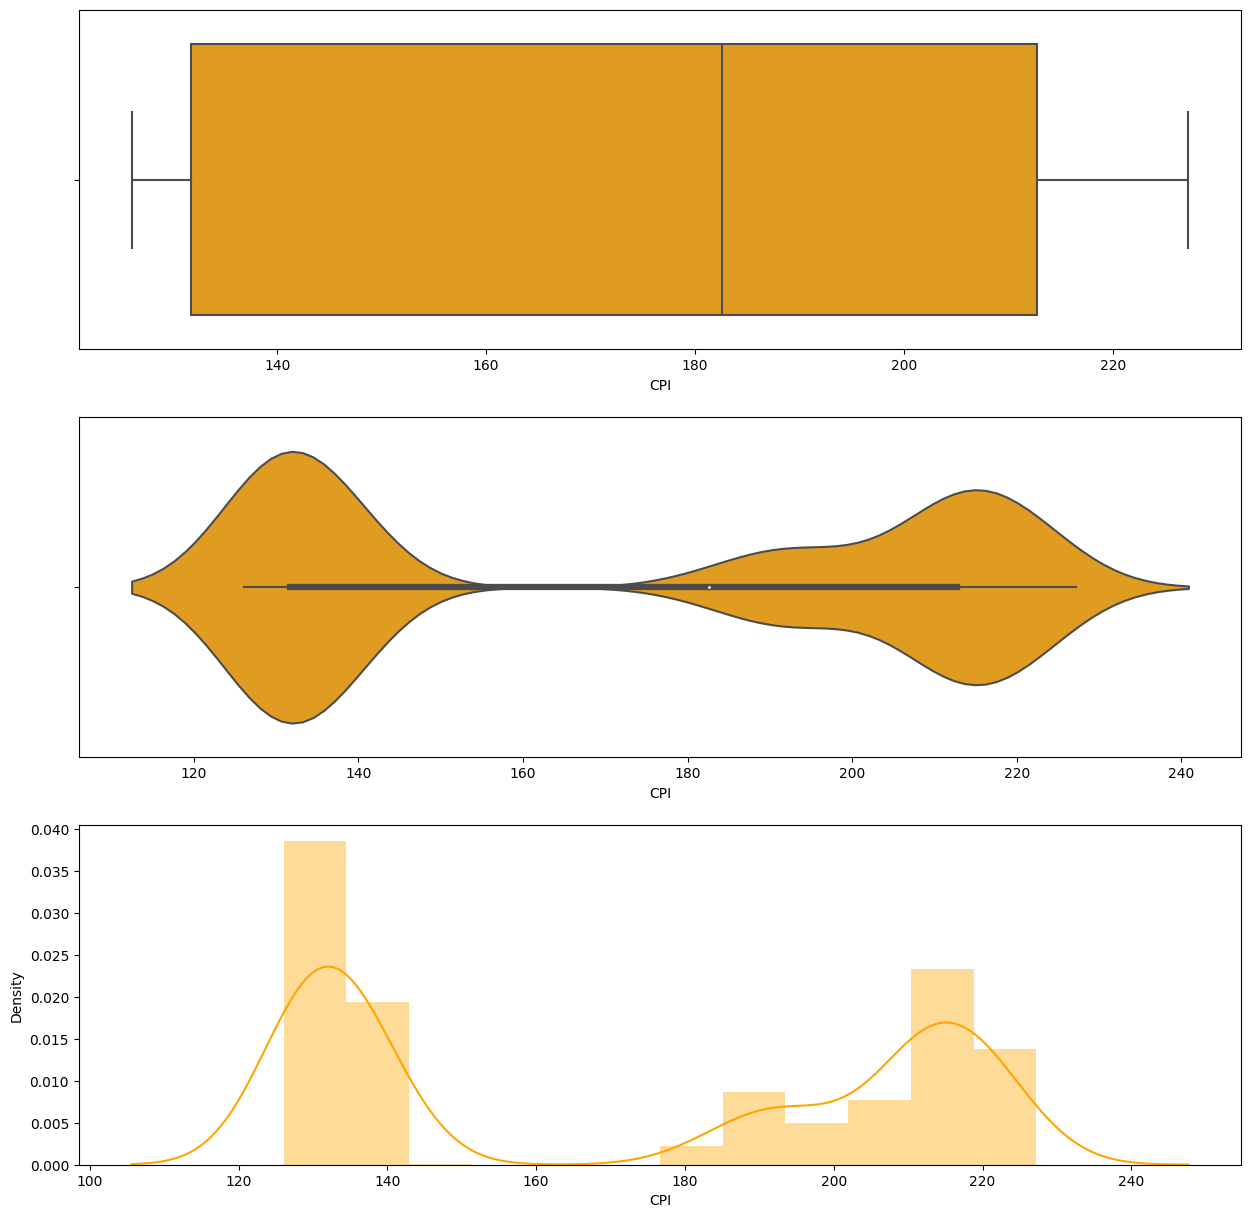

In [31]:
# CPI
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))
sns.boxplot(x = df['CPI'], ax=axs[0],color='orange')
sns.violinplot(x = df['CPI'], ax=axs[1],color='orange')
sns.distplot(df['CPI'],kde=True, ax=axs[2],color='orange')
plt.show()

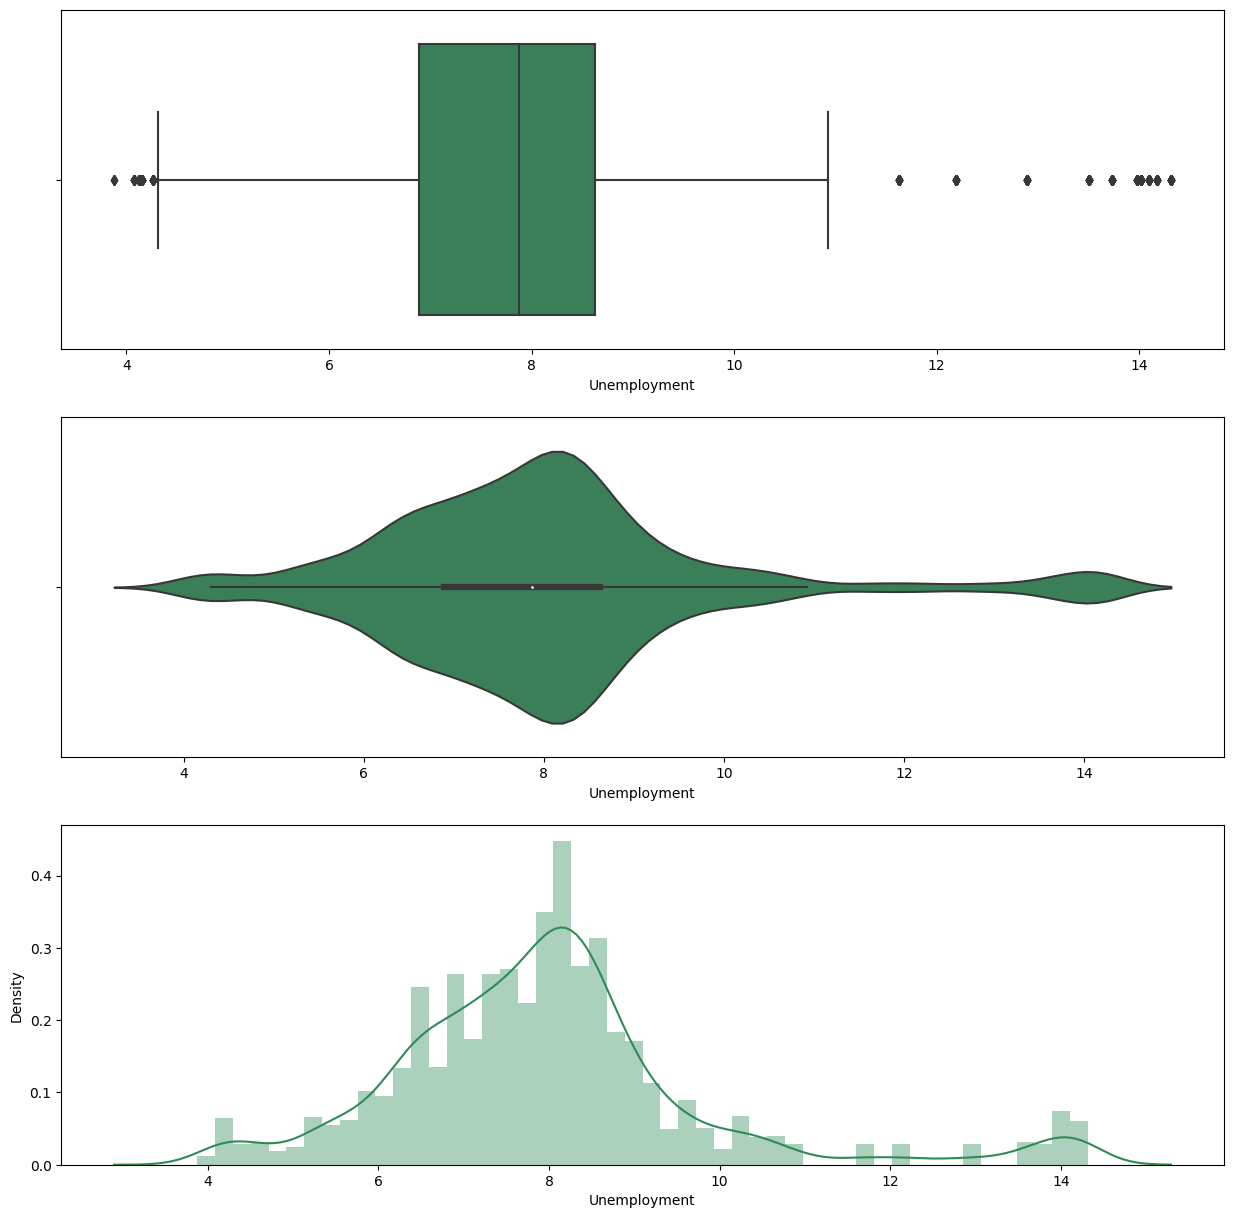

In [32]:
# Unemployment
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))
sns.boxplot(x = df['Unemployment'], ax=axs[0],color='seagreen')
sns.violinplot(x = df['Unemployment'], ax=axs[1],color='seagreen')
sns.distplot(df['Unemployment'],kde=True, ax=axs[2],color='seagreen')
plt.show()

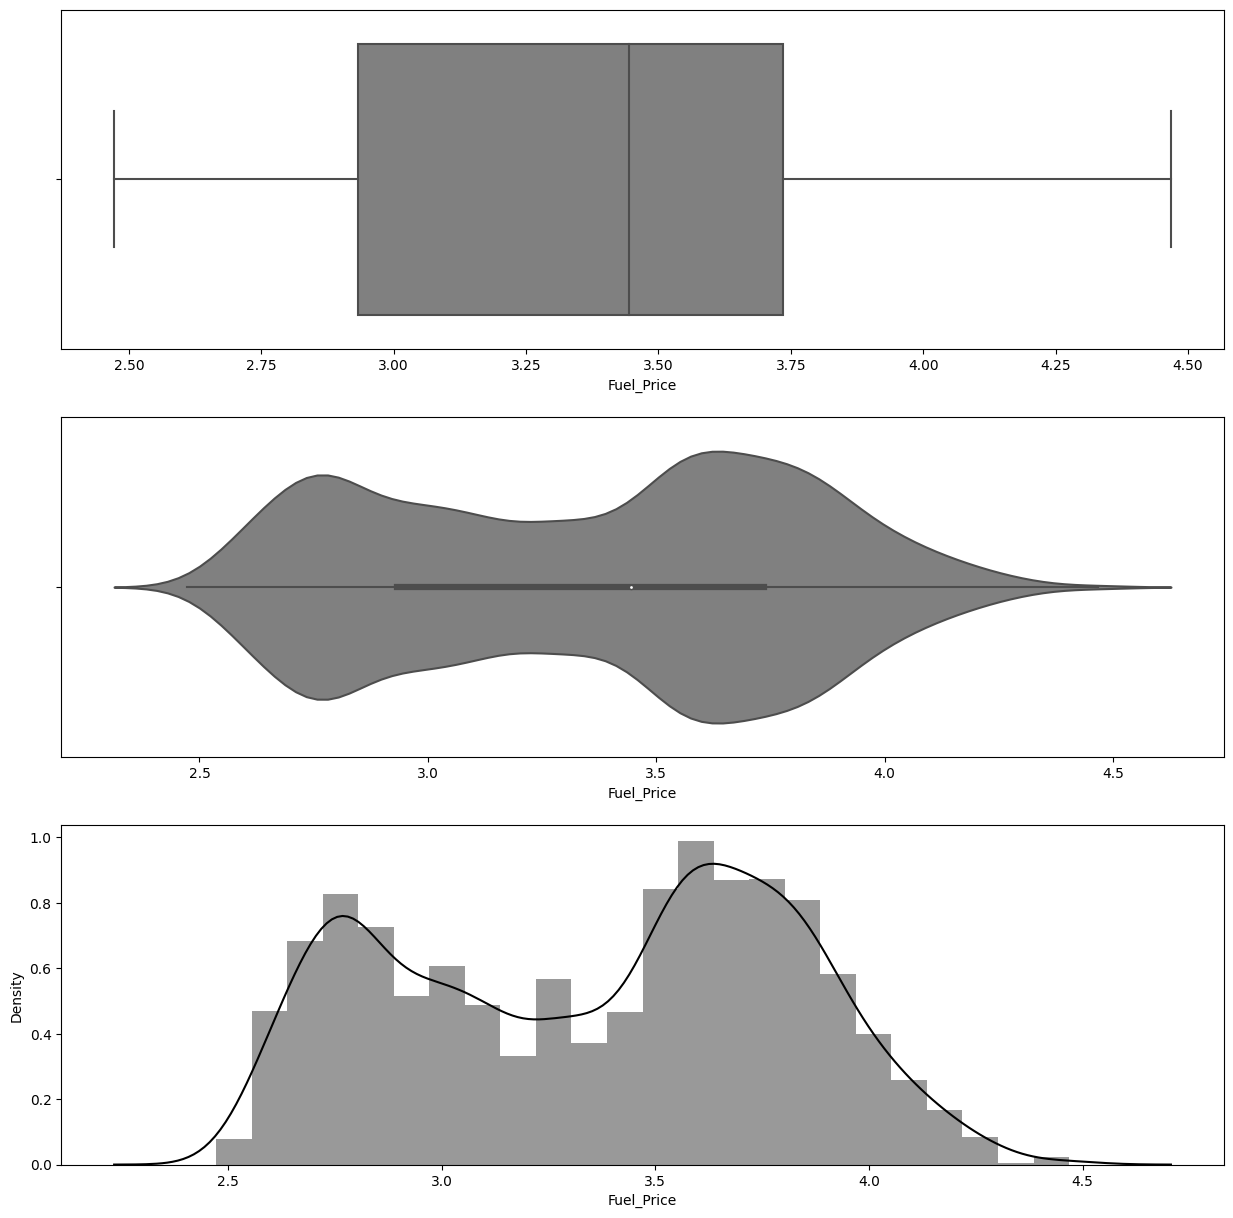

In [33]:
# Fuel_Price
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))
sns.boxplot(x = df['Fuel_Price'], ax=axs[0],color='grey')
sns.violinplot(x = df['Fuel_Price'], ax=axs[1],color='grey')
sns.distplot(df['Fuel_Price'],kde=True, ax=axs[2],color='black')
plt.show()

- There seem to be some outliers. let us fix these in the upcoming section...

## $Data Preprocessing$

- Removal of Outliers - Unemployment

In [34]:
df.shape

(6435, 10)

Text(0.5, 1.0, 'Boxplot of Unmeployment after removing outliers')

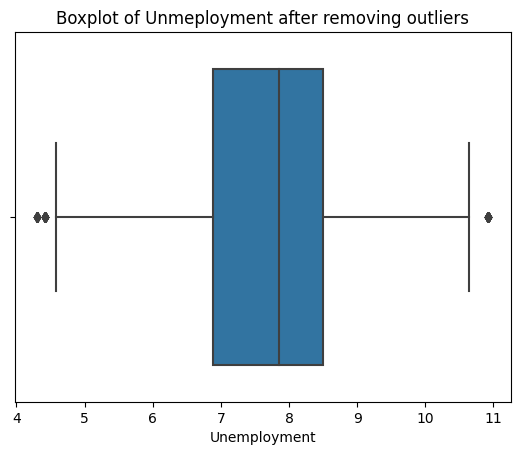

In [35]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Unemployment'] >= Q1-1.5*(IQR)]
df = df[df['Unemployment'] <= Q3+1.5*(IQR)]
sns.boxplot(x=df['Unemployment'])
plt.title('Boxplot of Unmeployment after removing outliers')

Text(0.5, 1.0, 'Boxplot of Temperature after removing outliers')

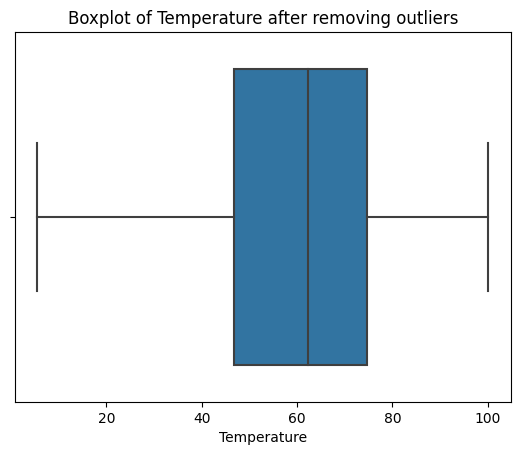

In [36]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Temperature'] >= Q1-1.5*(IQR)]
df = df[df['Temperature'] <= Q3+1.5*(IQR)]
sns.boxplot(x=df['Temperature'])
plt.title('Boxplot of Temperature after removing outliers')

In [37]:
df.shape

(5953, 10)

In [38]:
original_df.shape

(6435, 10)

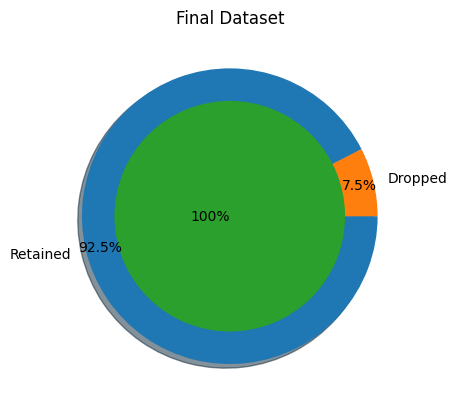

In [39]:
plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

- Before removal of outliers, The dataset had 6435 samples.
- After removal of outliers, The dataset now has 5953 samples.

In [40]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010


In [41]:
days = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
df['weekday'] = df['weekday'].map(days)
months={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'Novemenber':11,'December':12}
df['month']= df['month'].map(months)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [42]:
yr = {2010:0, 2011:1, 2012:2}
df['year'] = df['year'].map(yr)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,0


### $Checking For Multicollinearity$

In [43]:
df.shape

(5953, 10)

In [44]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,0


In [45]:
df2=df.drop(['Weekly_Sales'],axis=1)

In [46]:
df2['adding an intercept']=1

In [47]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns

In [48]:
vif_data["VIF"] = [variance_inflation_factor(df2.values, i)
                          for i in range(len(df2.columns))]

In [49]:
print(vif_data)

               feature         VIF
0                Store    1.139282
1         Holiday_Flag    1.174164
2          Temperature    1.157270
3           Fuel_Price    3.149143
4                  CPI    1.303162
5         Unemployment    1.226284
6              weekday    1.046956
7                month    1.202521
8                 year    3.217048
9  adding an intercept  229.354304


- We dont know the actual equation of the regression line thats why we cannot assume that the intercept term is zero.
- If we add the intercept term then all of the variances of the features map to the intercept term thats why a shrinkage is happened thats why all of the variances due to the features reduced

- There is no Multicollinearity in our dataset

## $Train Test Split$

##### Seperate Dependent and Independent Variables

In [50]:
X = df.drop(['Weekly_Sales'],axis=1)
Y = df['Weekly_Sales']

In [51]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,0,42.31,2.572,211.096358,8.106,6,5,0
1,1,1,38.51,2.548,211.242170,8.106,3,12,0
2,1,0,39.93,2.514,211.289143,8.106,4,2,0
3,1,0,46.63,2.561,211.319643,8.106,4,2,0
4,1,0,46.50,2.625,211.350143,8.106,0,5,0
...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,4,9,2
6431,45,0,64.89,3.985,192.170412,8.667,3,5,2
6432,45,0,54.47,4.000,192.327265,8.667,0,12,2
6433,45,0,56.47,3.969,192.330854,8.667,4,10,2


###### Split data into train and test set using train_test_split

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')

In [54]:
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [55]:
X_train

array([[ 0.,  0.,  0., ...,  4.,  3.,  0.],
       [ 0.,  0.,  0., ...,  4.,  4.,  2.],
       [ 0.,  0.,  0., ...,  4.,  7.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4., 10.,  1.],
       [ 0.,  0.,  0., ...,  5.,  9.,  0.],
       [ 0.,  0.,  0., ...,  4.,  6.,  0.]])

In [56]:
X_test

array([[0., 0., 0., ..., 4., 4., 1.],
       [0., 0., 0., ..., 4., 7., 2.],
       [0., 0., 0., ..., 4., 2., 2.],
       ...,
       [0., 0., 0., ..., 4., 4., 1.],
       [0., 0., 0., ..., 4., 2., 0.],
       [0., 0., 0., ..., 4., 9., 2.]])

## $Model Building$

#### We are building a Linear Regression model

In [57]:
lin = LinearRegression()
linear_reg=lin.fit(X_train,Y_train)

In [58]:
y_pred_train=lin.predict(X_train)

In [59]:
y_pred=lin.predict(X_test)

In [60]:
Y_test

4353    1461393.91
4561    1167829.33
2110     541292.64
5079     377464.62
1392    2218595.80
           ...    
4733     933924.44
2485    1095058.57
6213     281247.97
4007     488417.61
1282     516361.06
Name: Weekly_Sales, Length: 2382, dtype: float64

In [61]:
y_pred

array([1348358.7954337 , 1136061.71742184,  561616.04960635, ...,
        300449.21102733,  546290.82811599,  607351.68094468])

## $Residual Analysis$

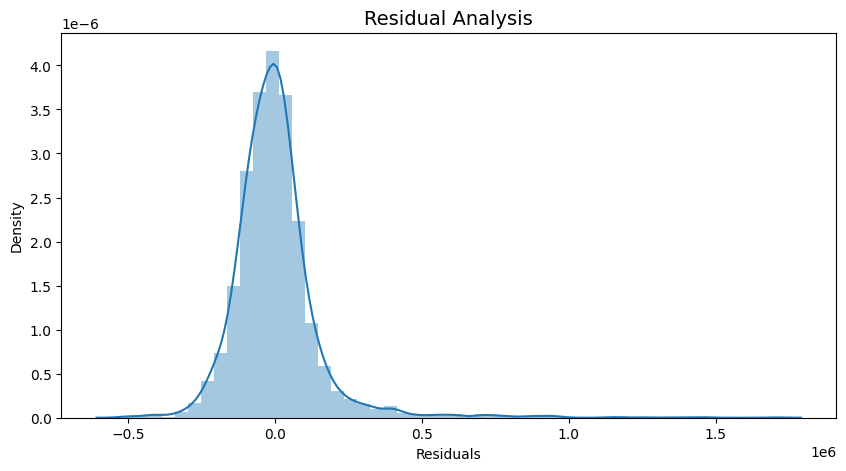

In [62]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))

res= Y_train-y_pred_train
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=14)
plt.show()

In [63]:
res

1008   -123138.933587
4261    -18182.898661
1883     54705.068745
2585    -12266.355086
353     -12356.561662
            ...      
4085     60615.732743
5630    -74643.333382
5665    -73271.392405
5872     -2534.834103
877     -70836.749021
Name: Weekly_Sales, Length: 3571, dtype: float64

In [64]:
y_pred_train

array([ 895678.053587  ,  446967.59866086, 1989450.32125463, ...,
       1010023.07240549,  585087.0941026 ,  551980.83902122])

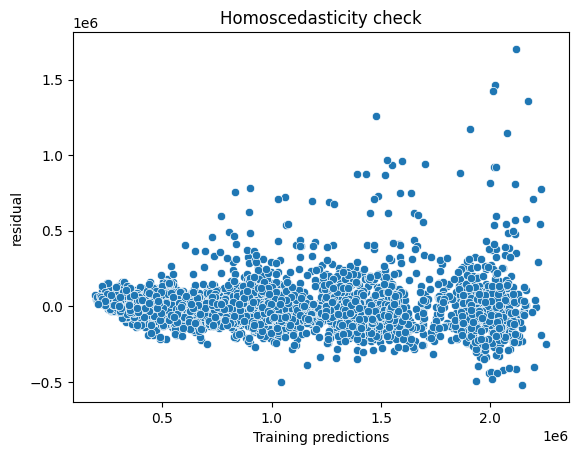

In [65]:
sns.scatterplot(x=y_pred_train,y=res)
plt.title("Homoscedasticity check")
plt.xlabel('Training predictions')                       
plt.ylabel('residual')
plt.show()

- From the above plot all of the points do not create a conic shape from the values of the residual at 0. Thats why we can say that the residuals are Homoscedastic that is all of the variances due to residuals are equal.

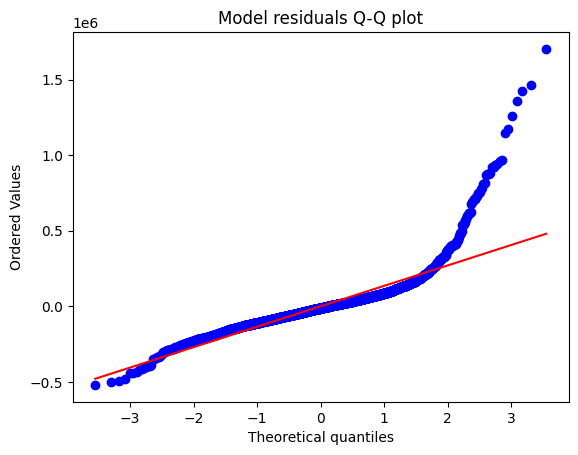

In [66]:
stats.probplot(res,dist = 'norm',plot = plt)
plt.title("Model residuals Q-Q plot")
plt.show()

- From the above plot we can see that, most of the residuals from the training data is fitted in a straight line, hence we can conclude our residuals follow a normal distribution.

## $Model Evaluation$

In [67]:
print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')

MSE: 26386757147.858818
MAE: 97161.96894267079


In [68]:
print(f'Training R2 Score :{r2_score(Y_train,y_pred_train)}')

Training R2 Score :0.9287159290630663


##### We got a value for R-squared which is 0.929 , which means the independent variables are able to expalin 92.9% of  variance in the dependent variable.

In [69]:
print(f'R2 Score : {r2_score(Y_test,y_pred)}')

R2 Score : 0.9215892974540326


##### The model performs well on the test data as well giving an R-squared of 0.922, which indicates the model generated is a good model and can be used for predicting the Weekly Sales of Walmart

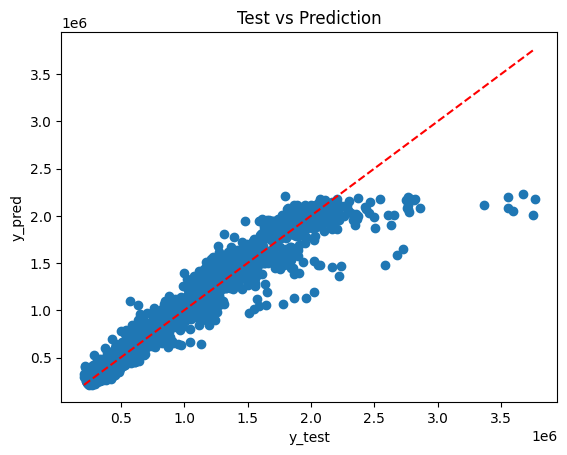

In [70]:
plt.scatter(Y_test,y_pred)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], 'r--')
plt.title('Test vs Prediction')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred')                       
plt.show()

- The above plot is a visualization of the Linear regression Fit

### <center><font face=' bold'> $The End$</font></center>